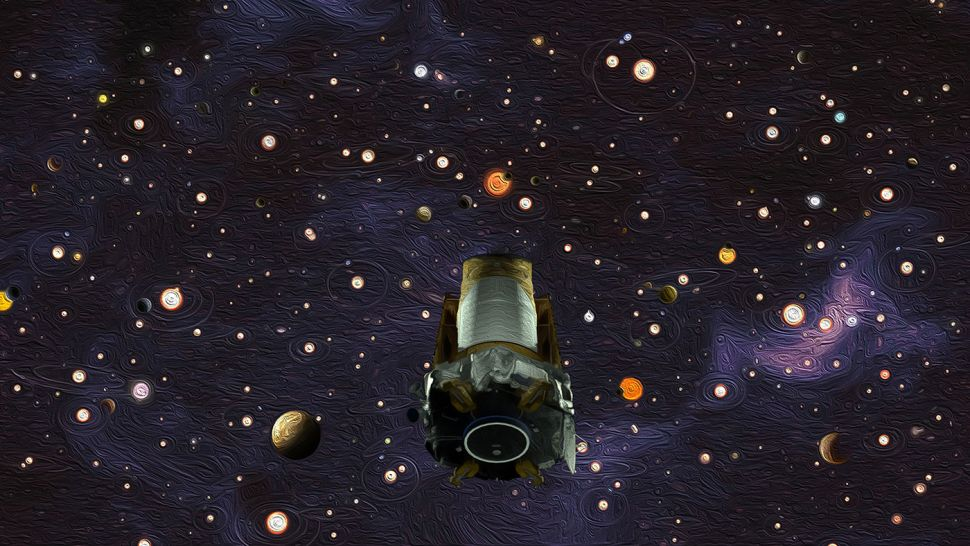

## Tabula Contentorum

* [Chapter 1. Description and preprocessing](#chapter1)
    * [Section 1.1 Importing modules](#section_1_1)
    * [Section 1.2 Importing dataset](#section_1_2)
    * [Section 1.3 Brief view of the partial content](#section_1_3)
    * [Section 1.4 Specific content for each column](#section_1_4)
    
* [Chapter 2. Visualization](#chapter2)
    * [Section 2.1 Example one](#section_2_1)
    * [Section 2.2 Example two](#section_2_2)
    * [Section 2.3 Example three](#section_2_3)
    * [Section 2.4 Example four](#section_2_4)
    * [Section 2.5 Correlation matrix](#section_2_5)
* [Chapter 3. Process missing values ](#chapter3)
    * [Section 3.1 Imputation method](#section_3_1)
* [Chapter 4. Binarization of nominal characteristics ](#chapter4)
    * [Section 4.1 Solution for the occurrence of multicollinearity](#section_4_1)
    * [Section 4.2 Correlation matrix](#section_4_2)
* [Chapter 5. Split the data into training and test samples ](#chapter5)
* [Chapter 6. The K-Nearest Neighbors Algorithm](#chapter5)
    * [Section 6.1 Importing modules](#section_6_1)
* [Chapter 7. Random Forest](#chapter7)
    * [Section 7.1 Importing modules](#section_7_1)
* [Chapter 8. Conclusion](#chapter8)


### Chapter 1. Description <a class="anchor" id="chapter1"></a>

NASA's Kepler Space Telescope was an observatory in space dedicated to finding planets outside our solar system, with a particular focus on finding planets that might resemble Earth. The telescope is dedicated to searching for exoplanets in star systems besides our own, with the ultimate goal of possibly finding other habitable planets besides our own. The original mission ended in 2013 due to mechanical failures, but the telescope has nevertheless been functional since 2014 on a "K2" extended mission. The observatory was in commission for just under nine years, from its launch in March 2009 to its decommission on Nov. 15, 2018.

#### Section 1.1 Importing modules <a class="anchor" id="section_1_1"></a>

In [2]:
# Matrices (matrices, vectors, linear algebra).
import numpy as np
# Data processing, CSV file I/O.
import pandas as pd
# Scientific graphics.
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn
%matplotlib inline

#### Section 1.2 Importing dataset <a class="anchor" id="section_1_2"></a>

In [3]:
# Loading the information stored in the variable from raw format(GitHub).
data = pd.read_csv('https://raw.githubusercontent.com/LioBuitrago/ML-Labs/main/cumulative.csv')

#### Section 1.3 Brief view of the partial content <a class="anchor" id="section_1_3"></a>

Taking into account the analytical needs, our first step is to review what are the general dimensions of the dataset, emphasizing the structure of columns and rows. Using the head() and tail() methods we can see the output of the first 5 elements and, correspondingly the last 5 elements. To be more exact, we obtain the shape of the table.

In [4]:
data.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [5]:
data.shape

(9564, 50)

In [6]:
data.tail()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.01570,-0.01570,0.765,0.023,-0.541,4.8060,0.6340,-0.6340,87.7,13.0,-13.0,1.11,0.32,-0.23,929.0,NaN,NaN,176.40,152.77,-77.60,8.4,1.0,q1_q17_dr25_tce,5638.0,169.0,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.00017,-0.00017,1.252,0.051,-0.049,3.2221,0.0174,-0.0174,1579.2,4.6,-4.6,29.35,7.70,-2.57,2088.0,NaN,NaN,4500.53,3406.38,-1175.26,453.3,1.0,q1_q17_dr25_tce,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.00769,-0.00769,0.043,0.423,-0.043,3.1140,0.2290,-0.2290,48.5,5.4,-5.4,0.72,0.24,-0.08,1608.0,NaN,NaN,1585.81,1537.86,-502.22,10.6,1.0,q1_q17_dr25_tce,6119.0,165.0,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.00285,-0.00285,0.147,0.309,-0.147,0.8650,0.1620,-0.1620,103.6,14.7,-14.7,1.07,0.36,-0.11,2218.0,NaN,NaN,5713.41,5675.74,-1836.94,12.3,1.0,q1_q17_dr25_tce,6173.0,193.0,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9563,9564,10156110,K07989.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,1,1,4.856035,6.356000e-05,-6.356000e-05,135.993300,0.01080,-0.01080,0.134,0.323,-0.134,3.0780,0.2830,-0.2830,76.7,10.8,-10.8,1.05,0.36,-0.12,1266.0,NaN,NaN,607.42,600.39,-194.33,8.2,1.0,q1_q17_dr25_tce,6469.0,158.0,-225.0,4.385,0.054,-0.216,1.193,0.410,-0.137,297.00977,47.121021,14.826


#### Section 1.4 Specific content for each column <a class="anchor" id="section_1_4"></a>

- kepid (Kepler Identification or KepID): Target identification number, as listed in the Kepler Input Catalog (KIC). The KIC was derived from a ground-based imaging survey of the Kepler field conducted prior to launch. The survey's purpose was to identify stars for the Kepler exoplanet survey by magnitude and color. The full catalog of 13 million sources can be searched at the MAST archive.
- kepoi_name (KOI Name): A number used to identify and track a Kepler Object of Interest (KOI). A KOI is a target identified by the Kepler Project that displays at least one transit-like sequence within Kepler time-series photometry that appears to be of astrophysical origin and initially consistent with a planetary transit hypothesis. A KOI name has an integer and a decimal part of the format KNNNNN.DD. The integer part designates the target star; the two-digit decimal part identifies a unique transiting object associated with that star. It is not necessarily the planetary candidate listed in that order within a DV report, nor does it indicate the distance of the planet from the the host star relative to other planets in the system.
- kepler_name (Keple Name): Kepler number name in the form "Kepler-N," plus a lower-case letter, identifying the planet. In general, these numbers are easier to remember than the corresponding KOI or KIC/KepID designations and are intended to clearly indicate a class of objects that have been confirmed or validated as planets—a step up from the planet candidate designation.
- koi_disposition (Exoplanet Archive Disposition): The category of this KOI from the Exoplanet Archive. Current values are CANDIDATE, FALSE POSITIVE, NOT DISPOSITIONED or CONFIRMED. All KOIs marked as CONFIRMED are also listed in the Exoplanet Archive Confirmed Planet table. Designations of CANDIDATE, FALSE POSITIVE, and NOT DISPOSITIONED are taken from the Disposition Using Kepler Data.
- koi_pdisposition (Disposition Using Kepler Data): The pipeline flag that designates the most probable physical explanation of the KOI. Typical values are FALSE POSITIVE, NOT DISPOSITIONED, and CANDIDATE. The value of this flag may change over time as the evaluation of KOIs proceeds to deeper levels of analysis using Kepler time-series pixel and light curve data, or follow-up observations. A not dispositioned value corresponds to objects for which the disposition tests have not yet been completed. A false positive has failed at least one of the tests described in Batalha et al. (2012). A planetary candidate has passed all prior tests conducted to identify false positives, although this does not a priori mean that all possible tests have been conducted. A future test may confirm this KOI as a false positive. False positives can occur when: 1) the KOI is in reality an eclipsing binary star, 2) the Kepler light curve is contaminated by a background eclipsing binary, 3) stellar variability is confused for coherent planetary transits, or 4) instrumental artifacts are confused for coherent planetary transits.
- koi_score (Disposition Score): A value between 0 and 1 that indicates the confidence in the KOI disposition. For CANDIDATEs, a higher value indicates more confidence in its disposition, while for FALSE POSITIVEs, a higher value indicates less confidence in that disposition. The value is calculated from a Monte Carlo technique such that the score's value is equivalent to the frction of iterations where the Robovetter yields a disposition of CANDIDATE.
- koi_fpflag_nt (Not Transit-Like Flag): A KOI whose light curve is not consistent with that of a transiting planet. This includes, but is not limited to, instrumental artifacts, non-eclipsing variable stars, and spurious (very low SNR) detections.	 	 
- koi_fpflag_ss (Stellar Eclipse Flag): A KOI that is observed to have a significant secondary event, transit shape, or out-of-eclipse variability, which indicates that the transit-like event is most likely caused by an eclipsing binary. However, self-luminous, hot Jupiters with a visible secondary eclipse will also have this flag set, but with a disposition of PC.	 	 
- koi_fpflag_co (Centroid Offset Flag): The source of the signal is from a nearby star, as inferred by measuring the centroid location of the image both in and out of transit, or by the strength of the transit signal in the target's outer (halo) pixels as compared to the transit signal from the pixels in the optimal (or core) aperture.
- koi_fpflag_ec (Ephemeris Match Indicates Contamination Flag): The KOI shares the same period and epoch as another object and is judged to be the result of flux contamination in the aperture or electronic crosstalk. 
- koi_period (Orbital Period (days)): The interval between consecutive planetary transits.
- koi_time0bk (Transit Epoch (BJD - 2,454,833.0)): The time corresponding to the center of the first detected transit in Barycentric Julian Day (BJD) minus a constant offset of 2,454,833.0 days. The offset corresponds to 12:00 on Jan 1, 2009 UTC. 
- koi_impact (Impact Parameter): The sky-projected distance between the center of the stellar disc and the center of the planet disc at conjunction, normalized by the stellar radius.
- koi_duration (Transit Duration (hours)): The duration of the observed transits. Duration is measured from first contact between the planet and star until last contact. Contact times are typically computed from a best-fit model produced by a Mandel-Agol (2002) model fit to a multi-quarter Kepler light curve, assuming a linear orbital ephemeris.
- koi_depth (Transit Depth (parts per million)): The fraction of stellar flux lost at the minimum of the planetary transit. Transit depths are typically computed from a best-fit model produced by a Mandel-Agol (2002) model fit to a multi-quarter Kepler light curve, assuming a linear orbital ephemeris.
- koi_prad (Planetary Radius (Earth radii)): The radius of the planet. Planetary radius is the product of the planet star radius ratio and the stellar radius.
- koi_teq (Equilibrium Temperature (Kelvin)): Approximation for the temperature of the planet. The calculation of equilibrium temperature assumes a) thermodynamic equilibrium between the incident stellar flux and the radiated heat from the planet, b) a Bond albedo (the fraction of total power incident upon the planet scattered back into space) of 0.3, c) the planet and star are blackbodies, and d) the heat is evenly distributed between the day and night sides of the planet.
- koi_insol (Insolation Flux [Earth flux]): Insolation flux is another way to give the equilibrium temperature. It depends on the stellar parameters (specifically the stellar radius and temperature), and on the semi-major axis of the planet. It's given in units relative to those measured for the Earth from the Sun.
- koi_model_snr (Transit Signal-to-Noise): Transit depth normalized by the mean uncertainty in the flux during the transits.
- koi_tce_plnt_num (TCE Planet Number): TCE Planet Number federated to the KOI.
- koi_tce_delivname (TCE Delivery Name): TCE delivery name corresponding to the TCE data federated to the KOI.
- koi_steff (Stellar Effective Temperature (Kelvin)): The photospheric temperature of the star.
- koi_slogg (Stellar Surface Gravity (log10(cm^s-2)): The base-10 logarithm of the acceleration due to gravity at the surface of the star.
- koi_srad (Stellar Radius (solar radii)): The photospheric radius of the star.
- ra (RA (deg)): KIC Right Ascension.	 
- dec (Dec (deg)):KIC Declination
- koi_kepmag (Kepler-band (mag)): Kepler-band (mag).


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

### Chapter 2. Visualization <a class="anchor" id="chapter2"></a>

Visualization and descriptive statistics are important steps in data analysis. We can obtain a summary of the characteristics by calling the method describe. For each quantitative trait, the mean values, standard deviation, minimum and minimum values, median, and quartile values are given.

In [8]:
data.describe()

,rowid,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,9564.000000,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,9564.000000,9110.000000,9110.000000,9201.000000,9110.000000,9110.000000,9564.000000,9110.000000,9110.000000,9.201000e+03,9110.000000,9110.000000,9201.000000,9201.000000,9201.000000,9201.000000,0.0,0.0,9.243000e+03,9.243000e+03,9.243000e+03,9201.000000,9218.000000,9201.000000,9096.000000,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,4782.500000,7.690628e+06,0.480829,0.188206,0.231598,0.194898,0.120033,75.671358,0.002148,-0.002148,166.183251,0.009933,-0.009933,0.735105,1.959861,-0.332557,5.621606,0.339942,-0.339942,2.379134e+04,123.197563,-123.197563,102.891778,17.657684,-33.023314,1085.385828,NaN,NaN,7.745737e+03,3.750698e+03,-4.043522e+03,259.895001,1.243654,5706.823280,144.635554,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,2761.033321,2.653459e+06,0.476928,0.390897,0.421875,0.396143,0.325018,1334.744046,0.008236,0.008236,67.918960,0.023097,0.023097,3.348832,9.421653,1.249828,6.471554,0.669823,0.669823,8.224268e+04,4112.615230,4112.615230,3077.639126,391.138501,1193.519910,856.351161,NaN,NaN,1.592047e+05,5.504421e+04,8.838831e+04,795.806615,0.664573,796.857947,47.052305,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,1.000000,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.172500,120.515914,0.000009,-0.569000,0.000000,0.000000,-59.320000,0.052000,0.000000,-20.200000,0.000000e+00,0.000000,-388600.000000,0.080000,0.000000,-77180.000000,25.000000,NaN,NaN,0.000000e+00,0.000000e+00,-5.600031e+06,0.000000,1.000000,2661.000000,0.000000,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,2391.750000,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,132.761718,0.001240,-0.010500,0.197000,0.040000,-0.445000,2.437750,0.050800,-0.350000,1.599000e+02,9.600000,-49.500000,1.400000,0.230000,-1.940000,539.000000,NaN,NaN,2.015000e+01,9.190000e+00,-2.873100e+02,12.000000,1.000000,5310.000000,106.000000,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,4782.500000,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,137.224595,0.004130,-0.004130,0.537000,0.193000,-0.207000,3.792600,0.142000,-0.142000,4.211000e+02,20.750000,-20.750000,2.390000,0.520000,-0.300000,878.000000,NaN,NaN,1.416000e+02,7.283000e+01,-4.026000e+01,23.000000,1.000000,5767.000000,157.000000,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,7173.250000,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,170.694603,0.010500,-0.001240,0.889000,0.378000,-0.046000,6.276500,0.350000,-0.050800,1.473400e+03,49.500000,-9.600000,14.930000,2.320000,-0.140000,1379.000000,NaN,NaN,8.702900e+02,5.194150e+02,-5.160000e+00,78.000000,1.000000,6112.000000,174.000000,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000
max,9564.000000,1.293514e+07,1.000000,1.000000,1.000000,1.000000,1.000000,129995.778400,0.172500,0.000000,1472.522306,0.569000,-0.000009,100.806000,85.540000,0.000000,138.5400

We could take as an example in parts of graphical representation two of the taken columns, in this case *koi_steff* and *koi_score*, which refer respectively to the photospheric temperature of the star and a value between 0 and 1 that indicates the confidence in the KOI disposition. For CANDIDATEs, a higher value indicates more confidence in its disposition, while for FALSE POSITIVEs, a higher value indicates less confidence in that disposition. Or on the other hand, analyze what is the relationship between the planet radius (the product of the planet star radius ratio and the stellar radius) and the disposition of Kepler's object of interest.

#### Section 2.1 Example one <a class="anchor" id="section_2_1"></a>

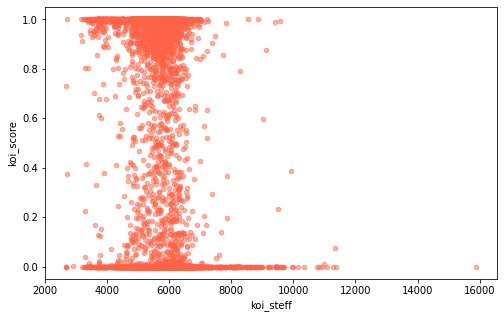

In [9]:
data.plot(kind='scatter', x='koi_steff', y='koi_score', alpha=0.5, color='tomato', figsize=(8.1,5))
plt.xlabel("koi_steff")
plt.ylabel("koi_score")
plt.show()

#### Section 2.2 Example two <a class="anchor" id="section_2_2"></a>

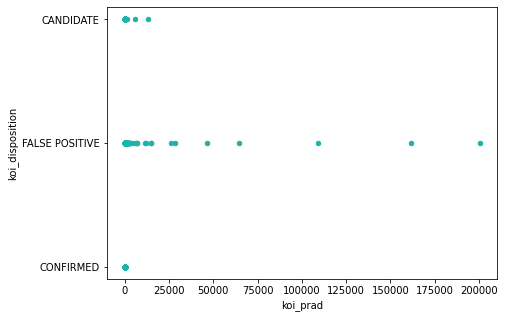

In [10]:
data.plot(kind='scatter', x='koi_prad', y='koi_disposition', alpha=1, color='lightseagreen', figsize=(7,5))
plt.xlabel("koi_prad")
plt.ylabel("koi_disposition")
plt.show()

#### Section 2.3 Example three <a class="anchor" id="section_2_3"></a>

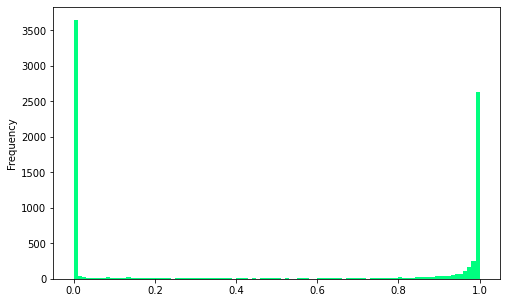

In [11]:
data.koi_score.plot(kind='hist', bins=100, color='springgreen', figsize=(8,5))
plt.show()

#### Section 2.4 Example four <a class="anchor" id="section_2_4"></a>

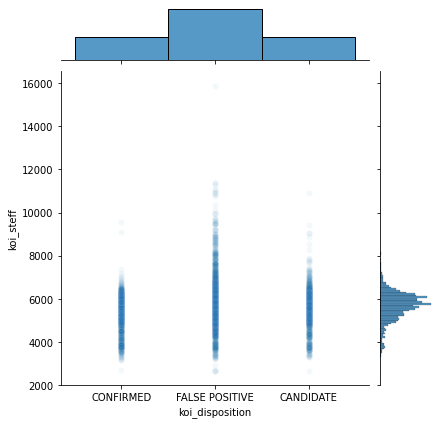

In [12]:
sns.jointplot(x='koi_disposition', y='koi_steff', alpha=.05, data=data)
pass

In [13]:
data.columns

Index(['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

We could also generate a correlation matrix, which is a table indicating the coefficients of connection between the factors. Each cell of the table shows the connection between the two factors. A connection table is used to outline information, as a contribution to further research and as an indication for state-of-the-art tests.

#### Section 2.5 Correlation matrix <a class="anchor" id="section_2_5"></a>


In [14]:
data.corr()

,rowid,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
rowid,1.000000,0.021448,-0.454493,0.316824,0.150513,0.037656,0.071214,0.003508,0.189612,-0.189612,0.073668,0.214269,-0.214269,0.033460,-0.037489,-0.007406,0.158047,0.240409,-0.240409,0.224789,0.022298,-0.022298,0.028485,0.027383,-0.025936,0.109324,NaN,NaN,0.026894,0.037885,-0.025272,0.182343,-0.057765,0.138338,0.228669,-0.220395,-0.153340,0.144285,-0.164429,0.065806,0.101128,-0.065181,0.042384,0.018023,-0.105103
kepid,0.021448,1.000000,0.095225,-0.034676,-0.048675,-0.099944,-0.044470,0.011511,0.011611,-0.011611,0.013620,-0.002222,0.002222,0.000358,-0.032893,-0.007212,-0.026407,-0.015497,0.015497,-0.017483,-0.016194,0.016194,0.003681,0.006156,-0.003850,-0.058705,NaN,NaN,-0.012403,-0.010518,0.013167,0.000998,0.025220,-0.025494,-0.004420,0.003128,0.052255,-0.026706,-0.024098,-0.027171,-0.027871,0.024720,-0.002288,0.993587,0.017525
koi_score,-0.454493,0.095225,1.000000,-0.349837,-0.582210,-0.521103,-0.398251,-0.070669,-0.093077,0.093077,-0.008329,-0.028337,0.028337,-0.214340,-0.121752,-0.072176,-0.173200,-0.095304,0.095304,-0.301010,-0.166398,0.166398,-0.076870,-0.054581,0.049689,-0.302279,NaN,NaN,-0.030995,-0.043238,0.026134,-0.269034,0.209081,-0.192544,-0.372432,0.333595,0.150017,-0.164267,0.228382,-0.071767,-0.117010,0.075529,-0.168666,0.094944,0.042112
koi_fpflag_nt,0.316824,-0.034676,-0.349837,1.000000,-0.253562,-0.020810,0.027112,0.032428,0.358862,-0.358862,0.250748,0.263610,-0.263610,0.056062,-0.022399,-0.046096,0.259361,0.370354,-0.370354,-0.045873,0.027879,-0.027879,0.045008,0.048595,-0.041881,-0.021832,NaN,NaN,0.002633,0.023554,-0.004896,-0.080243,0.031631,0.107827,0.138399,-0.155697,-0.120439,0.063078,-0.171242,0.034619,0.087934,-0.043843,0.006800,-0.038695,-0.103803
koi_fpflag_ss,0.150513,-0.048675,-0.582210,-0.253562,1.000000,0.149733,0.100001,-0.020984,-0.134983,0.134983,-0.120750,-0.172946,0.172946,0.043204,0.146152,0.051441,0.003639,-0.193946,0.193946,0.424323,0.007952,-0.007952,0.001429,0.006198,0.001770,0.188517,NaN,NaN,0.025877,0.022201,-0.019643,0.431023,-0.181990,0.103838,0.204430,-0.172346,-0.049751,0.114855,-0.044848,0.031932,0.036423,-0.031198,0.085946,-0.047653,0.020890
koi_fpflag_co,0.037656,-0.099944,-0.521103,-0.020810,0.149733,1.000000,0.525684,-0.020441,-0.088841,0.088841,-0.119989,-0.031579,0.031579,0.011166,0.108294,-0.002763,-0.045537,-0.013527,0.013527,-0.124987,-0.010466,0.010466,-0.011491,-0.015183,0.011606,0.253654,NaN,NaN,0.020266,0.019153,-0.014563,-0.128351,-0.122472,0.017077,0.145679,-0.111144,-0.010835,-0.016324,-0.046994,0.036803,0.029254,-0.028215,0.156078,-0.098131,0.064337
koi_fpflag_ec,0.071214,-0.044470,-0.398251,0.027112,0.100001,0.525684,1.000000,-0.017021,-0.082244,0.082244,-0.101113,0.001977,-0.001977,-0.005014,0.034619,0.009869,0.018939,0.016910,-0.016910,-0.087280,-0.003689,0.003689,-0.010148,-0.012598,0.008866,0.217418,NaN,NaN,0.030205,0.038885,-0.024718,-0.089897,-0.095758,0.011224,0.111690,-0.077628,0.002190,-0.005519,-0.036241,0.019274,0.026714,-0.010055,0.070002,-0.045339,0.038450
koi_period,0.003508,0.011511,-0.070669,0.032428,-0.020984,-0.020441,-0.017021,1.000000,0.053172,-0.053172,0.095580,0.020776,-0.020776,0.004928,-0.001884,-0.003843,0.037302,0.032922,-0.032922,-0.009180,0.002662,-0.002662,0.005135,0.003442,-0.004966,-0.049097,NaN,NaN,-0.002603,-0.003642,0.002448,-0.009614,-0.015107,-0.013552,0.005325,0.003194,0.001877,-0.006466,-0.003180,-0.000993,-0.000435,0.001556,0.005670,0.011479,-0.009858
koi_p

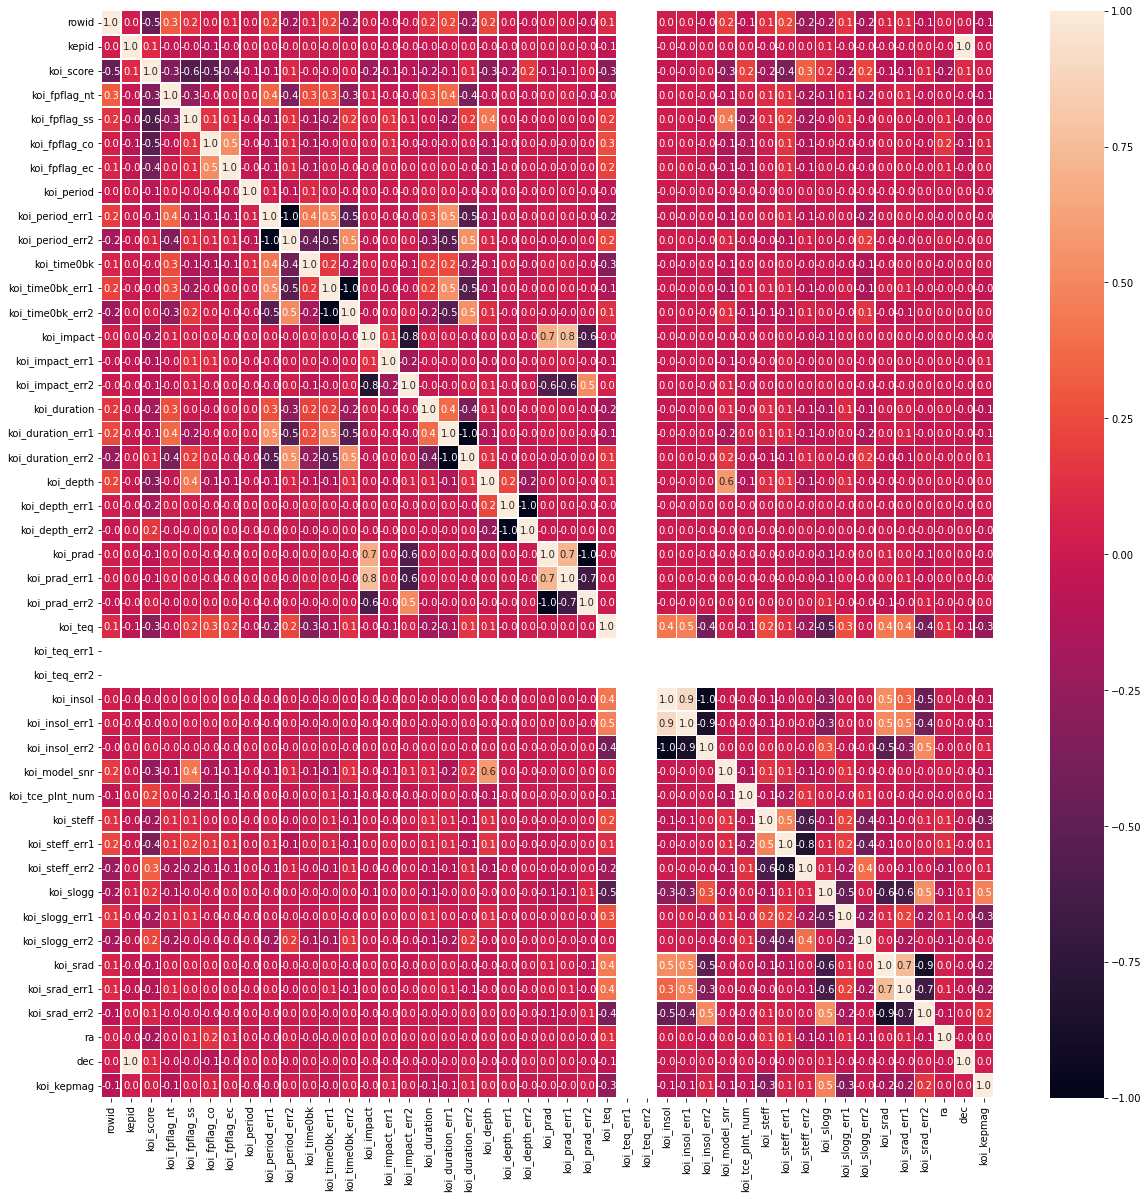

In [15]:
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt='.1f',ax=ax)
plt.show()

Regarding the order of the information, we can eliminate parts that are not necessary for the development of the main process.

In [16]:
del data['kepoi_name']
del data['kepler_name']
del data['koi_tce_delivname']
del data['koi_tce_plnt_num']

In [17]:
del data['koi_teq_err1']
del data['koi_teq_err2']

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   koi_disposition    9564 non-null   object 
 3   koi_pdisposition   9564 non-null   object 
 4   koi_score          8054 non-null   float64
 5   koi_fpflag_nt      9564 non-null   int64  
 6   koi_fpflag_ss      9564 non-null   int64  
 7   koi_fpflag_co      9564 non-null   int64  
 8   koi_fpflag_ec      9564 non-null   int64  
 9   koi_period         9564 non-null   float64
 10  koi_period_err1    9110 non-null   float64
 11  koi_period_err2    9110 non-null   float64
 12  koi_time0bk        9564 non-null   float64
 13  koi_time0bk_err1   9110 non-null   float64
 14  koi_time0bk_err2   9110 non-null   float64
 15  koi_impact         9201 non-null   float64
 16  koi_impact_err1    9110 

### Chapter 3. Process missing values  <a class="anchor" id="chapter3"></a>

The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values. Columns in the dataset which are having numeric continuous values can be replaced with the mean, median, or mode of remaining values in the column. Replacing the above two approximations (mean, median) is a statistical approach to handle the missing values.

In [19]:
miss_col = ('koi_score', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'koi_kepmag')

#### Section 3.1 Imputation method <a class="anchor" id="section_3_1"></a>

In [20]:
for col in miss_col:
    data[col] = data[col].fillna(data[col].mean())

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   koi_disposition    9564 non-null   object 
 3   koi_pdisposition   9564 non-null   object 
 4   koi_score          9564 non-null   float64
 5   koi_fpflag_nt      9564 non-null   int64  
 6   koi_fpflag_ss      9564 non-null   int64  
 7   koi_fpflag_co      9564 non-null   int64  
 8   koi_fpflag_ec      9564 non-null   int64  
 9   koi_period         9564 non-null   float64
 10  koi_period_err1    9564 non-null   float64
 11  koi_period_err2    9564 non-null   float64
 12  koi_time0bk        9564 non-null   float64
 13  koi_time0bk_err1   9564 non-null   float64
 14  koi_time0bk_err2   9564 non-null   float64
 15  koi_impact         9564 non-null   float64
 16  koi_impact_err1    9564 

### Chapter 4. Binarization of nominal characteristics  <a class="anchor" id="chapter4"></a>

To work with the categorical data, determined as out of range at the level of handling with the methods we are using from the used modules, we generate dummy variables with the help of the function get_dummies.

In [22]:
data = pd.get_dummies(data)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   rowid                            9564 non-null   int64  
 1   kepid                            9564 non-null   int64  
 2   koi_score                        9564 non-null   float64
 3   koi_fpflag_nt                    9564 non-null   int64  
 4   koi_fpflag_ss                    9564 non-null   int64  
 5   koi_fpflag_co                    9564 non-null   int64  
 6   koi_fpflag_ec                    9564 non-null   int64  
 7   koi_period                       9564 non-null   float64
 8   koi_period_err1                  9564 non-null   float64
 9   koi_period_err2                  9564 non-null   float64
 10  koi_time0bk                      9564 non-null   float64
 11  koi_time0bk_err1                 9564 non-null   float64
 12  koi_time0bk_err2    

Multi-collinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when we fit the model and interpret the results.

#### Section 4.1 Solution for the occurrence of multicollinearity<a class="anchor" id="section_4_1"></a>


In [24]:
del data['koi_disposition_FALSE POSITIVE']
del data['koi_pdisposition_CANDIDATE']
del data['koi_pdisposition_FALSE POSITIVE']

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   rowid                      9564 non-null   int64  
 1   kepid                      9564 non-null   int64  
 2   koi_score                  9564 non-null   float64
 3   koi_fpflag_nt              9564 non-null   int64  
 4   koi_fpflag_ss              9564 non-null   int64  
 5   koi_fpflag_co              9564 non-null   int64  
 6   koi_fpflag_ec              9564 non-null   int64  
 7   koi_period                 9564 non-null   float64
 8   koi_period_err1            9564 non-null   float64
 9   koi_period_err2            9564 non-null   float64
 10  koi_time0bk                9564 non-null   float64
 11  koi_time0bk_err1           9564 non-null   float64
 12  koi_time0bk_err2           9564 non-null   float64
 13  koi_impact                 9564 non-null   float

In [26]:
corr = data.corr()
corr

,rowid,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition_CANDIDATE,koi_disposition_CONFIRMED
rowid,1.000000,0.021448,-0.427716,0.316824,0.150513,0.037656,0.071214,0.003508,0.185915,-0.185915,0.073668,0.210091,-0.210091,0.033005,-0.036758,-0.007261,0.158047,0.235722,-0.235722,0.221730,0.021863,-0.021863,0.028097,0.027011,-0.025583,0.107836,0.026591,0.037458,-0.024987,0.179861,0.136456,0.225019,-0.216665,-0.151253,0.141982,-0.161805,0.064911,0.099514,-0.064141,0.042384,0.018023,-0.105092,0.034309,-0.502597
kepid,0.021448,1.000000,0.087421,-0.034676,-0.048675,-0.099944,-0.044470,0.011511,0.011336,-0.011336,0.013620,-0.002170,0.002170,0.000351,-0.032113,-0.007041,-0.026407,-0.015130,0.015130,-0.017155,-0.015810,0.015810,0.003612,0.006040,-0.003778,-0.057602,-0.012198,-0.010345,0.012949,0.000979,-0.025016,-0.004307,0.003045,0.051274,-0.026020,-0.023479,-0.026661,-0.027154,0.024084,-0.002288,0.993587,0.017521,0.021426,0.086808
koi_score,-0.427716,0.087421,1.000000,-0.270261,-0.559839,-0.498053,-0.384224,-0.004200,-0.054121,0.054121,-0.006490,-0.024897,0.024897,-0.046302,-0.119017,-0.025337,-0.156131,-0.071876,0.071876,-0.288928,-0.010190,0.010190,-0.007380,-0.014229,0.005243,-0.277093,-0.030566,-0.039119,0.025838,-0.265127,-0.177037,-0.351067,0.315365,0.136824,-0.152166,0.168197,-0.069885,-0.103322,0.073717,-0.155436,0.087169,0.038291,0.424628,0.614967
koi_fpflag_nt,0.316824,-0.034676,-0.270261,1.000000,-0.253562,-0.020810,0.027112,0.032428,0.335044,-0.335044,0.250748,0.246114,-0.246114,0.052934,-0.020912,-0.043037,0.259361,0.345774,-0.345774,-0.043314,0.026029,-0.026029,0.042497,0.045884,-0.039545,-0.020614,0.002509,0.022446,-0.004665,-0.075767,0.101813,0.129662,-0.145806,-0.113721,0.059096,-0.160433,0.032688,0.082383,-0.041075,0.006800,-0.038695,-0.103801,-0.266904,-0.257237
koi_fpflag_ss,0.150513,-0.048675,-0.559839,-0.253562,1.000000,0.149733,0.100001,-0.020984,-0.133177,0.133177,-0.120750,-0.170632,0.170632,0.042787,0.144197,0.050753,0.003639,-0.191351,0.191351,0.420221,0.007846,-0.007846,0.001415,0.006138,0.001753,0.186694,0.025665,0.022019,-0.019482,0.426857,0.102835,0.200166,-0.168681,-0.049270,0.112459,-0.043913,0.031623,0.035663,-0.030547,0.085946,-0.047653,0.020886,-0.285618,-0.293209
koi_fpflag_co,0.037656,-0.099944,-0.498053,-0.020810,0.149733,1.000000,0.525684,-0.020441,-0.087339,0.087339,-0.119989,-0.031045,0.031045,0.011077,0.106462,-0.002716,-0.045537,-0.013298,0.013298,-0.123989,-0.010289,0.010289,-0.011399,-0.015062,0.011513,0.251628,0.020132,0.019026,-0.014467,-0.127326,0.016940,0.143336,-0.109312,-0.010748,-0.016061,-0.046239,0.036509,0.028784,-0.027761,0.156078,-0.098131,0.064337,-0.272734,-0.272591
koi_fpflag_ec,0.071214,-0.044470,-0.384224,0.027112,0.100001,0.525684,1.000000,-0.017021,-0.081007,0.081007,-0.101113,0.001947,-0.001947,-0.004985,0.034099,0.009721,0.018939,0.016656,-0.016656,-0.086784,-0.003634,0.003634,-0.010091,-0.012526,0.008815,0.216183,0.030099,0.038749,-0.024632,-0.089386,0.011161,0.110251,-0.076591,0.002178,-0.005448,-0.035774,0.019164,0.026370,-0.009926,0.070002,-0.045339,0.038449,-0.204729,-0.206653
koi_period,0.003508,0.011511,-0.004200,0.032428,-0.020984,-0.020441,-0.017021,1.000000,0.053160,-0.053160,0.095580,0.020771,-0.020771,0.004927,-0.001883,-0.003842,0.037302,0.032914,-0.032914,-0.009178,0.002661,-0.002661,0.005134,0.003442,-0.004965,-0.049087,-0.002603,-0.003642,0.002448,-0.009612,-0.013549,0.005324,0.003193,0.001876,-0.006464,-0.003179,-0.000993,-0.000435,0.001555,0.005670,0.011479,-0.009858,0.

#### Section 4.2 Correlation matrix <a class="anchor" id="section_4_2"></a>

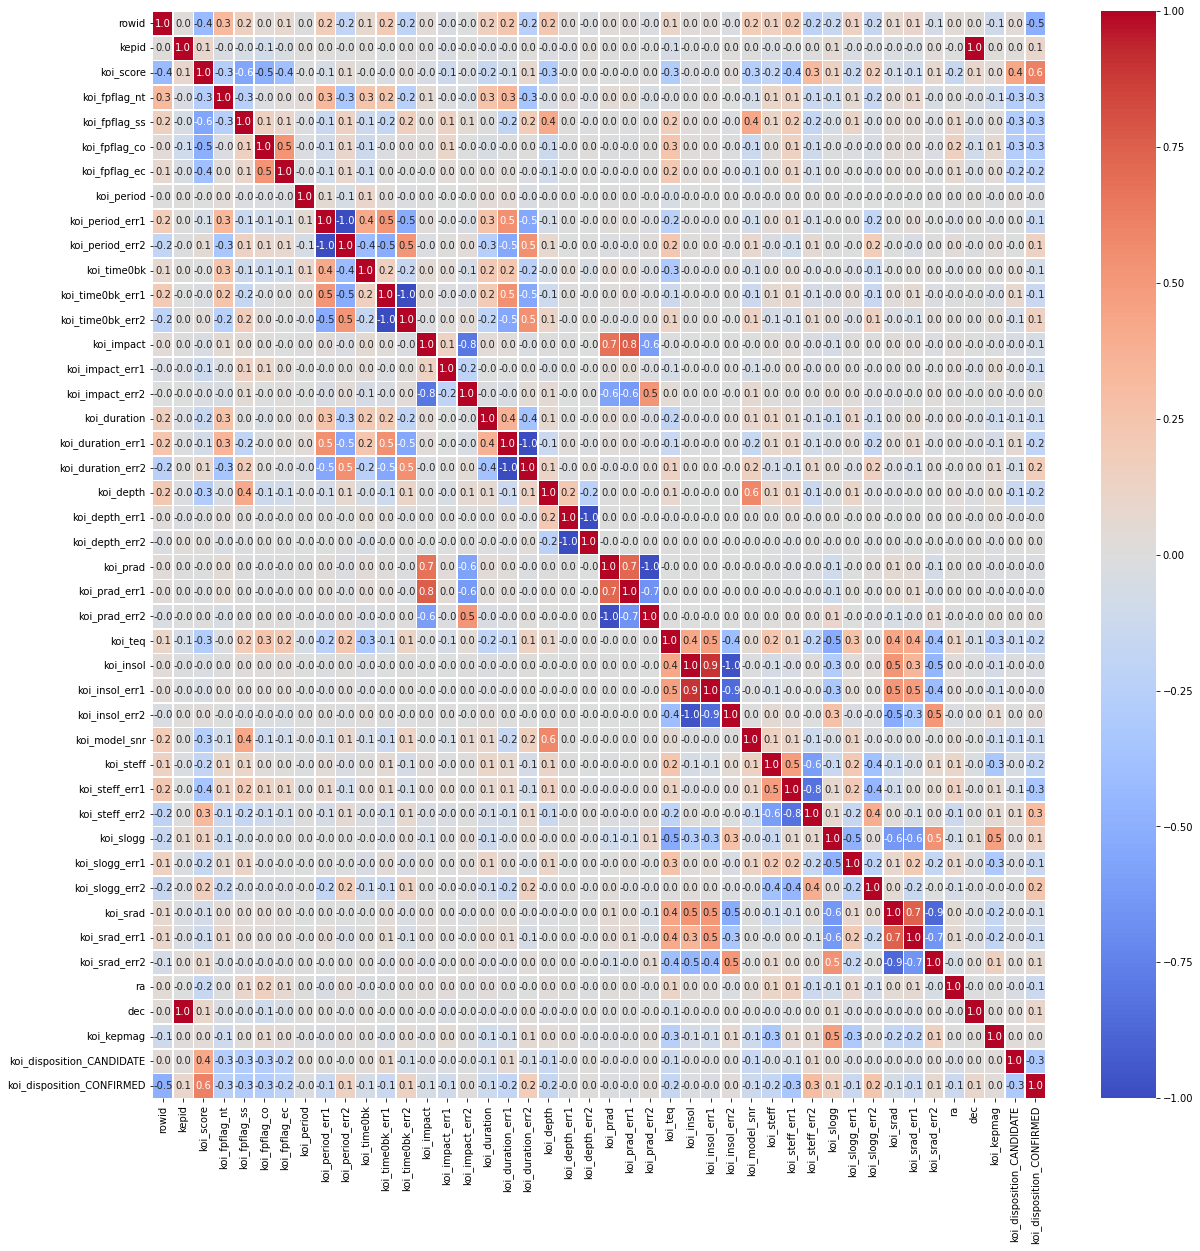

In [27]:
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True, linewidths=.5, fmt='.1f',ax=ax, cmap='coolwarm')
plt.show()

In [28]:
del data['rowid']
del data['kepid']

In [29]:
data.shape

(9564, 42)

Taking into account that our chosen variable cannot be represented only with binary terms, therefore it is necessary to readjust the determinations.

In [30]:
data['koi_disposition'] = [0]*9564

In [31]:
for i in range(0, 9564):
    if(data.at[i, 'koi_disposition_CANDIDATE'] == 1):
        data.at[i, 'koi_disposition'] = 1
    elif(data.at[i, 'koi_disposition_CONFIRMED'] == 1):
        data.at[i, 'koi_disposition'] = 2
    elif(data.at[i, 'koi_disposition_CANDIDATE'] == 0 and data.loc[i, 'koi_disposition_CONFIRMED'] == 0):
        data.loc[i, 'koi_disposition'] = 0

In [32]:
data

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition_CANDIDATE,koi_disposition_CONFIRMED,koi_disposition
0,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0,1,2
1,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0,1,2
2,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,0,0,0
3,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0,0,0
4,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,0.000,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,0.765,0.023,-0.541,4.80600,0.63400,-0.63400,87.7,13.0,-13.0,1.11,0.32,-0.23,929.0,176.40,152.77,-77.60,8.4,5638.0,169.0,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478,0,0,0
9560,0.000,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,1579.2,4.6,-4.6,29.35,7.70,-2.57,2088.0,4500.53,3406.38,-1175.26,453.3,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082,0,0,0
9561,0.497,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,0.043,0.423,-0.043,3.11400,0.22900,-0.22900,48.5,5.4,-5.4,0.72,0.24,-0.08,1608.0,1585.81,1537.86,-502.22,10.6,6119.0,165.0,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757,1,0,1
9562,0.021,0,0,1,0,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,0.16200,-0.16200,103.6,14.7,-14.7,1.07,0.36,-0.11,2218.0,5713.41,5675.74,-1836.94,12.3,6173.0,193.0,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385,0,0,0


In [33]:
del data['koi_disposition_CANDIDATE']
del data['koi_disposition_CONFIRMED']

### Chapter 5. Split the data into training and test samples <a class="anchor" id="chapter5"></a>



In [34]:
train_data = data.loc[:6999, :]
test_data = data.loc[7000:, :]


In [35]:
x_train = train_data.loc[:, train_data.columns != 'koi_disposition']
y_train = train_data['koi_disposition']
x_test = test_data.loc[:, test_data.columns != 'koi_disposition']
y_test = test_data['koi_disposition']

In [36]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape, data.shape

((7000, 40), (7000,), (2564, 40), (2564,), (9564, 41))

### Chapter 6. The K-Nearest Neighbors Algorithm <a class="anchor" id="chapter6"></a>

The K Nearest Neighbor algorithm belongs to the category of supervised learning and is used for classification and regression. It is a versatile algorithm that is also used to impute missing values and resample data sets. As the name (K Nearest Neighbor) suggests, it considers the K nearest neighbors (data points) to predict the class or continuous value of the new data point.

#### Section 6.1 Importing modules <a class="anchor" id="section_6_1"></a>

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In the machine learning model, the parameters to be manually selected are called hyperparameters. For example, the number of decision trees in the random forest, the number of hidden layers and the number of nodes in each layer in the artificial neural network model, etc., all need to be specified in advance. Inappropriate selection of hyperparameters will lead to under-fitting or over-fitting problems. When selecting hyperparameters, there are two ways, one is to adjust based on experience and the other is to select parameters of different sizes, incorporate them into the model and select the best performing parameters.

One way to tune is to manually modulate the hyperparameters until we find a good combination of hyperparameters. Doing so will be very time consuming and we may not have time to explore multiple combinations, so here we can use GridSearchCV to make this search work.
GridSearchCV is a class available in scikit-learn that allows us to systematically evaluate and select the parameters of a model. By specifying a model and the parameters to be tested, the performance of the former can be evaluated against the latter by cross-validation.

In [38]:
k_hyper = {'n_neighbors': range(1, 101)}

In [39]:
grid_search = GridSearchCV(KNeighborsClassifier(), k_hyper)

In [40]:
from sklearn import preprocessing
scaler_train = preprocessing.StandardScaler().fit(x_train)
x_train_scaled = scaler_train.transform(x_train)
scaler_test = preprocessing.StandardScaler().fit(x_test)
x_test_scaled = scaler_test.transform(x_test)

In [41]:
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 101)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [42]:
grid_search.best_params_

{'n_neighbors': 24}

In [43]:
model_knn = grid_search.best_estimator_

In [44]:
knn_train_predict = model_knn.predict(x_train_scaled)
knn_test_predict = model_knn.predict(x_test_scaled)

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
con_knn_train = confusion_matrix(y_train, knn_train_predict)
con_knn_test = confusion_matrix(y_test, knn_test_predict)

In [46]:
con_knn_train

array([[3032,   54,    8],
       [  94,  810,  759],
       [  50,  181, 2012]])

In [51]:
con_knn_test

array([[1779,   74,   76],
       [  24,  240,  321],
       [   1,    8,   41]])

In [52]:
knn_train_acc = accuracy_score(y_train, knn_train_predict)
knn_test_acc = accuracy_score(y_test, knn_test_predict)
knn_train_acc, knn_test_acc

(0.8362857142857143, 0.8034321372854915)

### Chapter 7. Random Forest <a class="anchor" id="chapter7"></a>

A Random Forest is an ensemble of decision trees combined with bagging. When using bagging, what is actually happening is that different trees see different portions of the data. No single tree sees all of the training data. This results in each tree being trained with different data samples for the same problem. In this way, by combining their results, some errors are compensated by others and we have a prediction that generalizes better.


#### Section 7.1 Importing modules <a class="anchor" id="section_7_1"></a>

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
ran_for = RandomForestClassifier(n_estimators = 10000, n_jobs = -1, random_state = 0)

In [55]:
ran_for.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [56]:
ran_train_predict = ran_for.predict(x_train)
ran_test_predict = ran_for.predict(x_test)

In [58]:
con_ran_train = confusion_matrix(y_train, ran_train_predict)
con_ran_test = confusion_matrix(y_test, ran_test_predict)

In [59]:
con_ran_train

array([[3094,    0,    0],
       [   0, 1663,    0],
       [   0,    0, 2243]])

In [60]:
con_ran_test

array([[1929,    0,    0],
       [  53,  516,   16],
       [   2,   25,   23]])

In [61]:
ran_train_acc = accuracy_score(y_train, ran_train_predict)
ran_test_acc = accuracy_score(y_test, ran_test_predict)
ran_train_acc, ran_test_acc

(1.0, 0.9625585023400937)

### Chapter 8. Conclusion <a class="anchor" id="chapter8"></a>

It was possible to generate a study in terms not so advanced, with a good efficiency, perhaps it would be something more optimal if some more developed versions were added, taking into account the use of all the factors that make up the process. 